In [80]:
import pandas as pd
import numpy as np #numerical python
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline 
#to run this library in jupyter notebook
import math
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [39]:
data = pd.read_csv(r'C:\Users\DAMILOLA\Desktop\Ugo\Practice ML\ML Datasets\Titanic Dataset\titanic.csv')

In [40]:
data.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [41]:
print(f'The number of passengers in the original data is {len(data.index)}')

The number of passengers in the original data is 887


# Analyzing Data

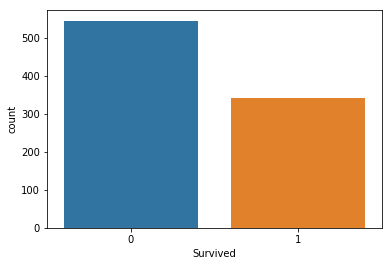

In [42]:
sns.countplot(x='Survived', data=data)


This means that about 550 people did not survive as opposed to about 350 people who survived

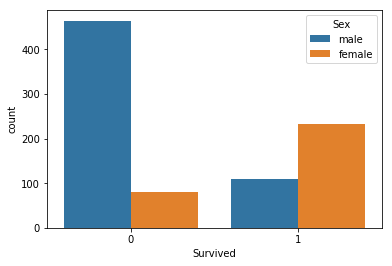

In [43]:
sns.countplot(x='Survived', hue='Sex', data=data)

This means:
- about 480 males did not survive.
- about 70 females did not survive.
- about 100 males survived.
- about 250 females survived.

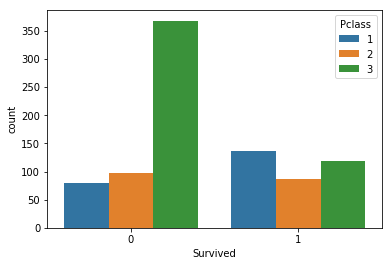

In [44]:
sns.countplot(x='Survived', hue='Pclass', data=data)

This means:
- about 80 passengers in 1st class did not survive.
- about 90 passengers in 2nd class did not survive.
- about 350 passengers in 3rd class did not survive.
- about 130 passengers in 1st class survived.
- about 70 passengers in 2nd survived.
- about 110 passengers in 3rd survived.

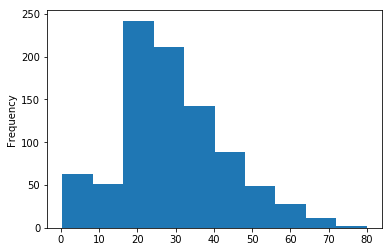

In [45]:
data['Age'].plot.hist()

This means we have more passengers between the age 20 and 40

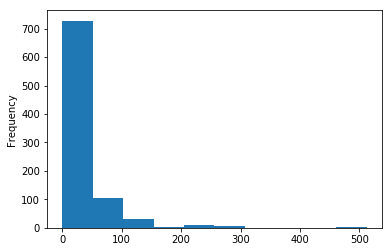

In [46]:
data['Fare'].plot.hist()

This means we have more passengers between the age 20 and 40

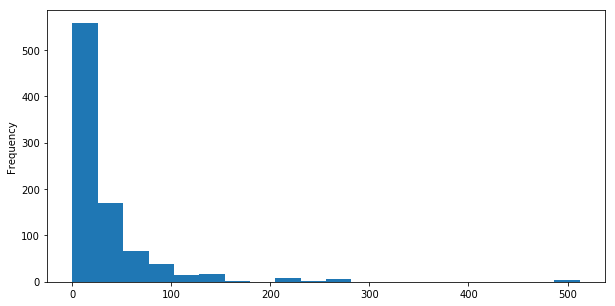

In [47]:
data['Fare'].plot.hist(bins=20, figsize=(10,5))

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.5+ KB


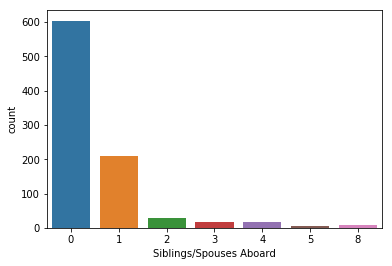

In [49]:
sns.countplot(x='Siblings/Spouses Aboard', data=data)

This means that very small amount of Siblings and Spouse were on board

# DATA WRANGLING

In [50]:
data.isnull()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [51]:
data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

This is know if you have any missing values

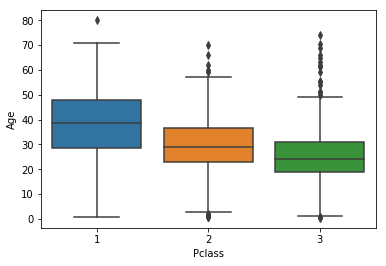

In [52]:
sns.boxplot(x='Pclass', y='Age', data=data)

This shows that most of the people in first class were more matured and within the age range of 30 to 50

Inputation: Filling values into empty data slots, and drop unnecessary columns

# DATA WRANGLING

if there is a column that is not useful or has null values, you can use df.dropna() to remove that column

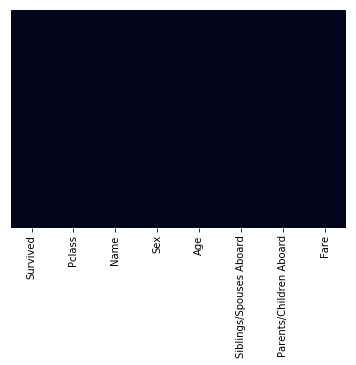

In [53]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False) # This is to check visually if there is any wrong value in the dataset

In [54]:
data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

This means that the dataset is clean

We still have string values and we have to convert them to categorical variables into to perform Linear Regression

In [55]:
pd.get_dummies(data['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [56]:
sex = pd.get_dummies(data['Sex'], drop_first=True) # To drop the first column

In [57]:
pcl = pd.get_dummies(data['Pclass'], drop_first=True) # To drop the first column

In [58]:
data = pd.concat([data, sex, pcl], axis=1)

In [59]:
data.drop(['Sex', 'Pclass', 'Name'], axis=1, inplace=True)

## Train Data

In [63]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [67]:
lr = LogisticRegression()

In [69]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
predictions = lr.predict(X_test)

In [77]:
classification_report(y_test, predictions)

'             precision    recall  f1-score   support\n\n          0       0.79      0.80      0.79       162\n          1       0.68      0.68      0.68       105\n\navg / total       0.75      0.75      0.75       267\n'

In [79]:
confusion_matrix(y_test, predictions)

array([[129,  33],
       [ 34,  71]], dtype=int64)

In [81]:
accuracy_score(y_test, predictions)

0.74906367041198507